In [239]:
!pip install mplcyberpunk

In [240]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import mplcyberpunk

In [241]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Amazon Sales data.csv")

In [242]:
df.head(10)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
5,Australia and Oceania,Solomon Islands,Baby Food,Online,C,2/4/2015,547995746,2/21/2015,2974,255.28,159.42,759202.72,474115.08,285087.64
6,Sub-Saharan Africa,Angola,Household,Offline,M,4/23/2011,135425221,4/27/2011,4187,668.27,502.54,2798046.49,2104134.98,693911.51
7,Sub-Saharan Africa,Burkina Faso,Vegetables,Online,H,7/17/2012,871543967,7/27/2012,8082,154.06,90.93,1245112.92,734896.26,510216.66
8,Sub-Saharan Africa,Republic of the Congo,Personal Care,Offline,M,7/14/2015,770463311,8/25/2015,6070,81.73,56.67,496101.10,343986.90,152114.20
9,Sub-Saharan Africa,Senegal,Cereal,Online,H,4/18/2014,616607081,5/30/2014,6593,205.70,117.11,1356180.10,772106.23,584073.87


In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [244]:
df.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


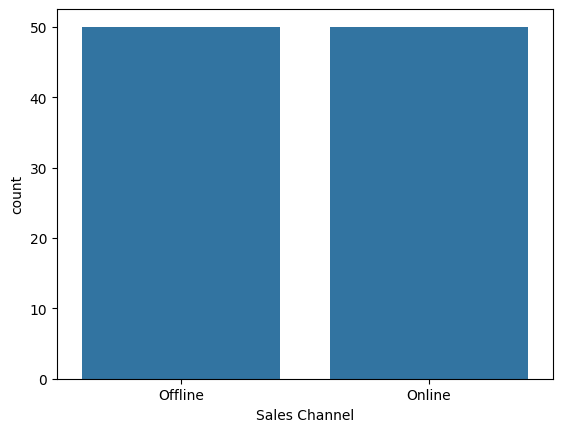

In [245]:
sns.countplot(x = 'Sales Channel', data = df)
mplcyberpunk.add_glow_effects()

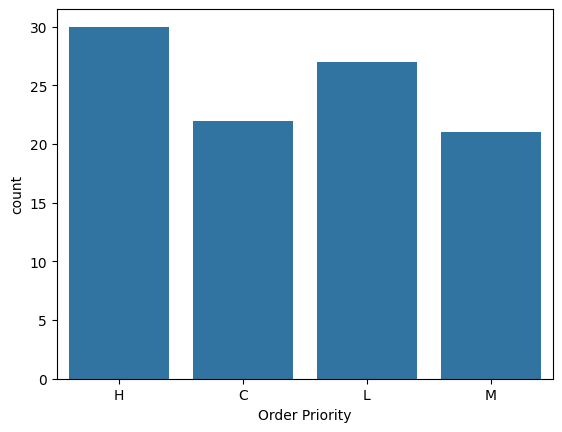

In [246]:
sns.countplot(x = 'Order Priority', data = df)
mplcyberpunk.add_glow_effects()

<Axes: xlabel='Unit Price', ylabel='Unit Cost'>

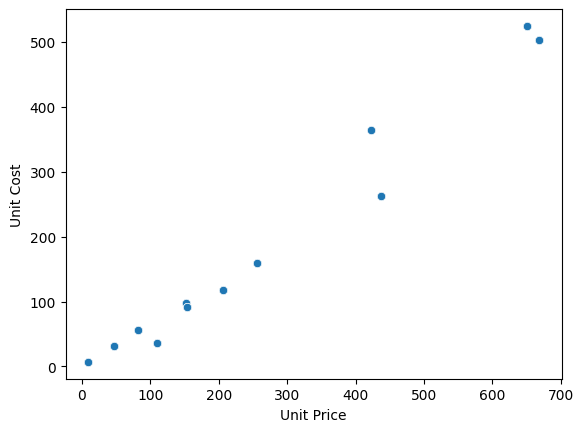

In [247]:
sns.scatterplot(x = 'Unit Price', y = 'Unit Cost', data = df)

<Axes: xlabel='Total Cost', ylabel='Total Revenue'>

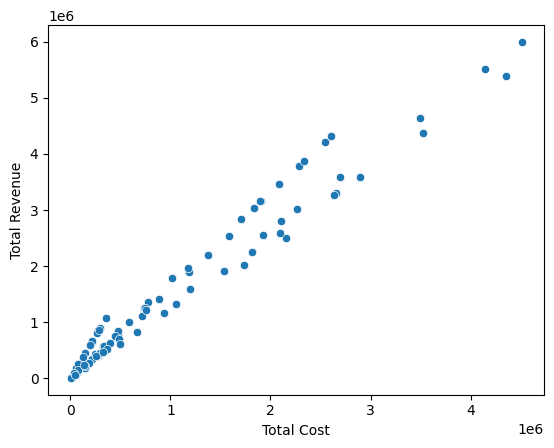

In [248]:
sns.scatterplot(x = 'Total Cost', y = 'Total Revenue', data = df)

<Axes: xlabel='Total Cost', ylabel='Total Profit'>

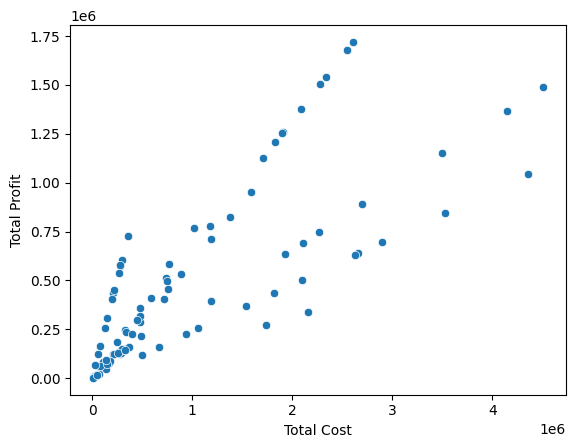

In [249]:
sns.scatterplot(x = 'Total Cost', y = 'Total Profit', data = df)

In [250]:
print("Total revenue generated: ", df['Total Revenue'].sum())

Total revenue generated:  137348768.31


In [251]:
print("Total Cost: ", df['Total Cost'].sum())

Total Cost:  93180569.91000001


In [252]:
print("Total profit generated: ", df['Total Profit'].sum())

Total profit generated:  44168198.39999999


In [253]:
print("Max profit:", df['Total Profit'].max())

Max profit: 1719922.04


In [254]:
print("Minimum profit:", df['Total Profit'].min())

Minimum profit: 1258.02


In [255]:
df['Profit Margin'] = (df['Total Profit']/df['Total Revenue'])*100

In [256]:
df.head(10)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Profit Margin
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,37.550924
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,43.067574
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,19.386987
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,25.830654
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,19.386987
5,Australia and Oceania,Solomon Islands,Baby Food,Online,C,2/4/2015,547995746,2/21/2015,2974,255.28,159.42,759202.72,474115.08,285087.64,37.550924
6,Sub-Saharan Africa,Angola,Household,Offline,M,4/23/2011,135425221,4/27/2011,4187,668.27,502.54,2798046.49,2104134.98,693911.51,24.799856
7,Sub-Saharan Africa,Burkina Faso,Vegetables,Online,H,7/17/2012,871543967,7/27/2012,8082,154.06,90.93,1245112.92,734896.26,510216.66,40.977541
8,Sub-Saharan Africa,Republic of the Congo,Personal Care,Offline,M,7/14/2015,770463311,8/25/2015,6070,81.73,56.67,496101.10,343986.90,152114.20,30.661936
9,Sub-Saharan Africa,Senegal,Cereal,Online,H,4/18/2014,616607081,5/30/2014,6593,205.70,117.11,1356180.10,772106.23,584073.87,43.067574


In [257]:
df['Average Revenue per Unit'] = df['Total Revenue']/df['Units Sold']

In [258]:
df.head(10)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Profit Margin,Average Revenue per Unit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,37.550924,255.28
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,43.067574,205.70
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,19.386987,651.21
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,25.830654,9.33
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,19.386987,651.21
5,Australia and Oceania,Solomon Islands,Baby Food,Online,C,2/4/2015,547995746,2/21/2015,2974,255.28,159.42,759202.72,474115.08,285087.64,37.550924,255.28
6,Sub-Saharan Africa,Angola,Household,Offline,M,4/23/2011,135425221,4/27/2011,4187,668.27,502.54,2798046.49,2104134.98,693911.51,24.799856,668.27
7,Sub-Saharan Africa,Burkina Faso,Vegetables,Online,H,7/17/2012,871543967,7/27/2012,8082,154.06,90.93,1245112.92,734896.26,510216.66,40.977541,154.06
8,Sub-Saharan Africa,Republic of the Congo,Personal Care,Offline,M,7/14/2015,770463311,8/25/2015,6070,81.73,56.67,496101.10,343986.90,152114.20,30.661936,81.73
9,Sub-Saharan Africa,Senegal,Cereal,Online,H,4/18/2014,616607081,5/30/2014,6593,205.70,117.11,1356180.10,772106.23,584073.87,43.067574,205.70


<Axes: xlabel='Item Type', ylabel='count'>

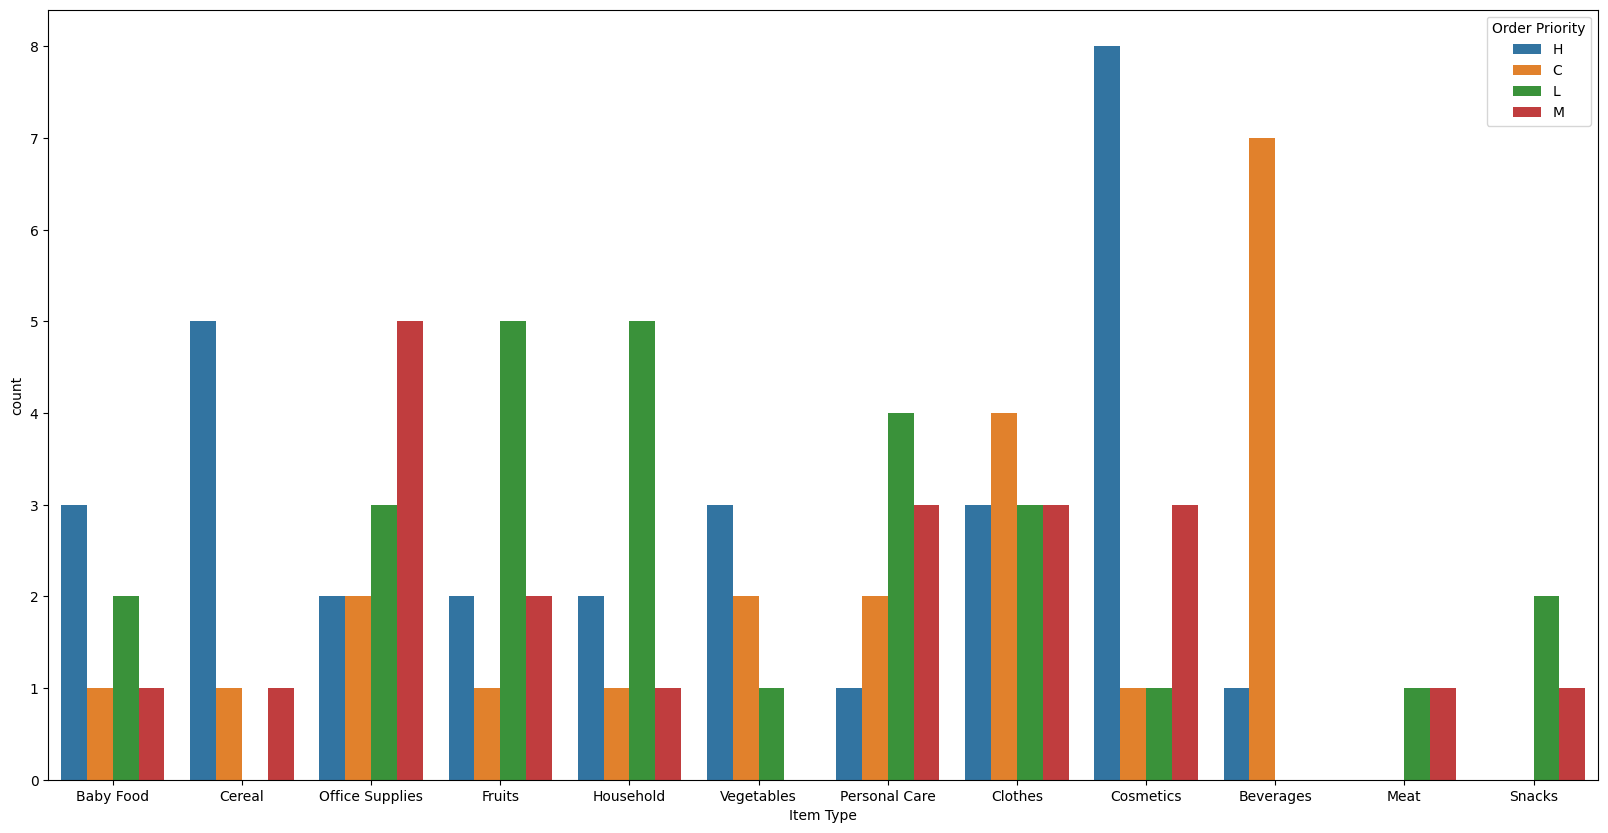

In [259]:
plt.figure(figsize = (20,10))
sns.countplot(x = 'Item Type', data = df, hue = 'Order Priority')

<Axes: xlabel='Region', ylabel='Total Revenue'>

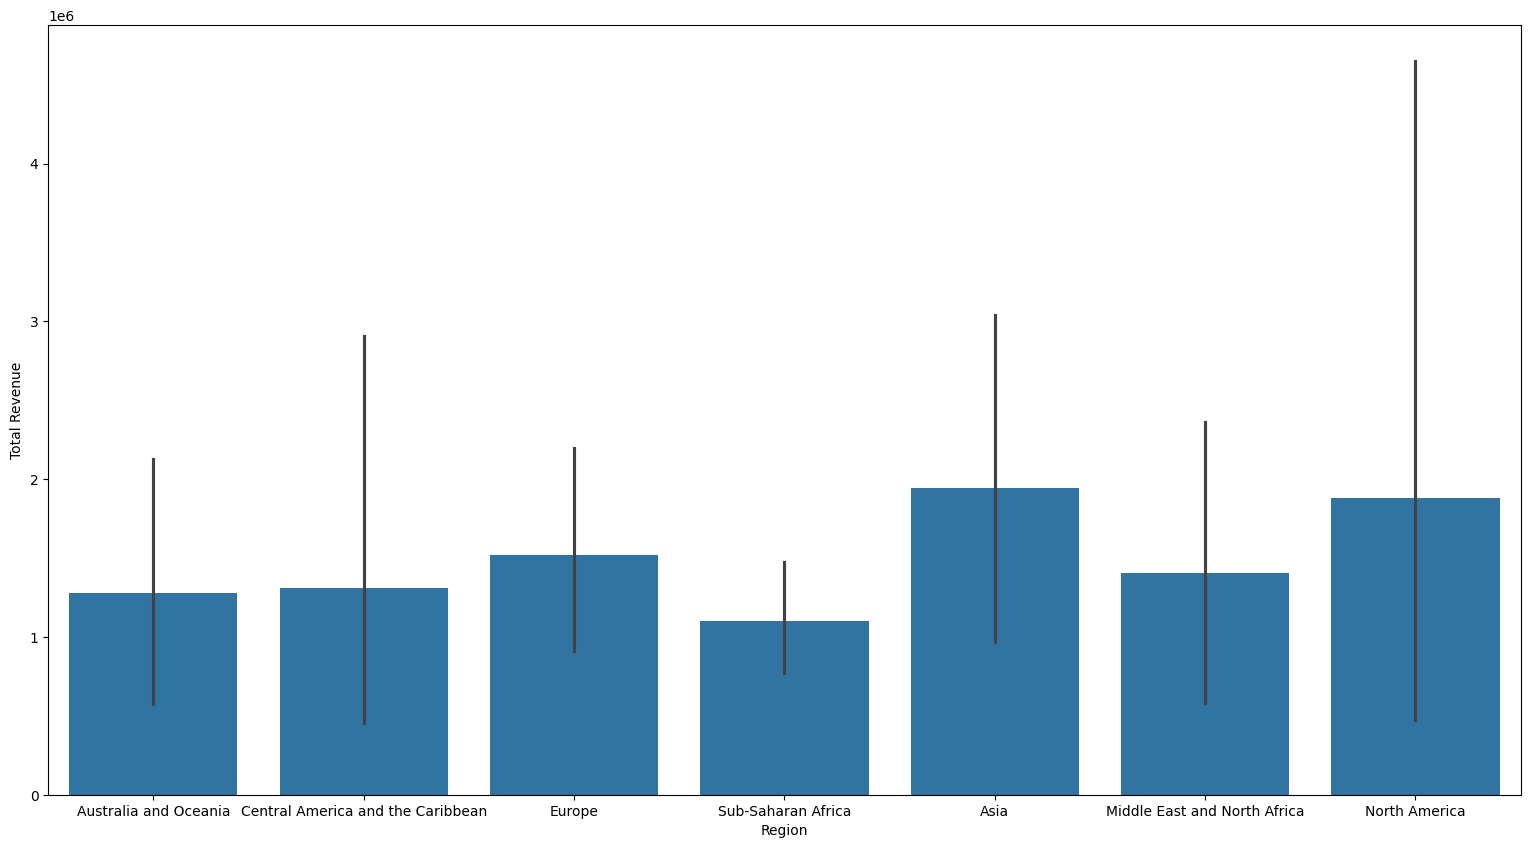

In [260]:
plt.figure(figsize = (19,10))
sns.barplot(x = 'Region', y = 'Total Revenue', data = df)

<Axes: xlabel='Region', ylabel='Total Profit'>

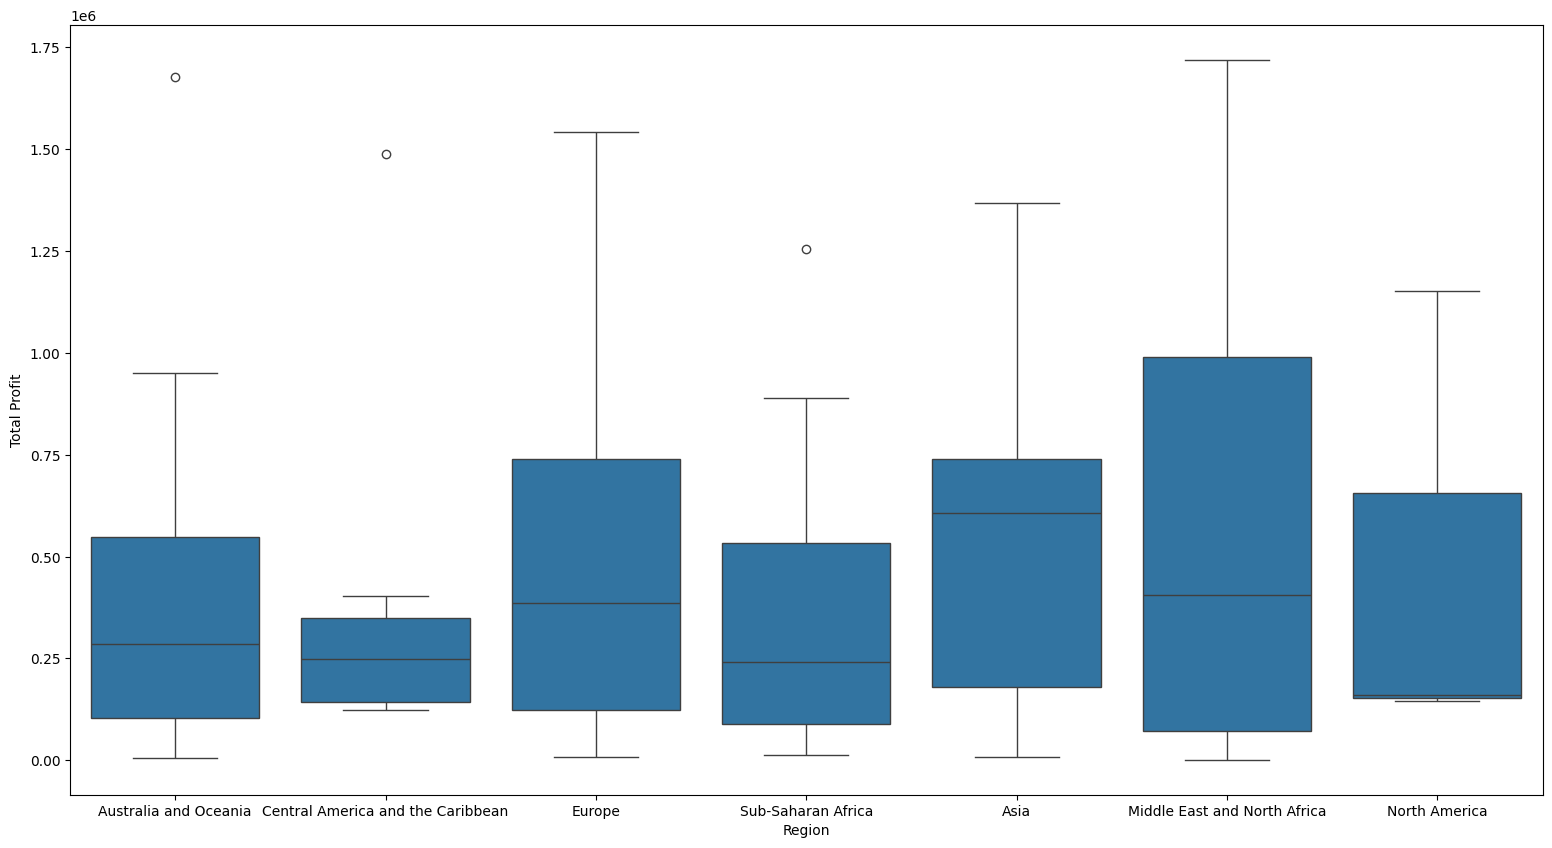

In [261]:
plt.figure(figsize = (19,10))
sns.boxplot(x = 'Region', y = 'Total Profit', data = df)

In [262]:
df['Sales Channel'].value_counts()

Sales Channel
Offline    50
Online     50
Name: count, dtype: int64

In [263]:
df['Region'].value_counts()

Region
Sub-Saharan Africa                   36
Europe                               22
Australia and Oceania                11
Asia                                 11
Middle East and North Africa         10
Central America and the Caribbean     7
North America                         3
Name: count, dtype: int64

In [264]:
df['Country'].value_counts()

Country
The Gambia               4
Sierra Leone             3
Sao Tome and Principe    3
Mexico                   3
Australia                3
                        ..
Comoros                  1
Iceland                  1
Macedonia                1
Mauritania               1
Mozambique               1
Name: count, Length: 76, dtype: int64

In [265]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit',
       'Profit Margin', 'Average Revenue per Unit'],
      dtype='object')

In [266]:
new_r = pd.get_dummies(df['Region'], dtype = int)
region = pd.DataFrame(new_r)
new_c = pd.get_dummies(df['Country'], dtype = int)
country = pd.DataFrame(new_c)

In [267]:
region = region.replace({'True':1, 'False':0})

In [268]:
region

,Asia,Australia and Oceania,Central America and the Caribbean,Europe,Middle East and North Africa,North America,Sub-Saharan Africa
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,1
96,1,0,0,0,0,0,0
97,0,0,0,0,0,0,1
98,0,0,0,0,0,1,0


In [269]:
country

,Albania,Angola,Australia,Austria,Azerbaijan,Bangladesh,Belize,Brunei,Bulgaria,Burkina Faso,...,South Sudan,Spain,Sri Lanka,Switzerland,Syria,The Gambia,Turkmenistan,Tuvalu,United Kingdom,Zambia
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [270]:
new_Channel = pd.get_dummies(df['Sales Channel'], dtype = int)
Channel = pd.DataFrame(new_Channel)

In [271]:
Channel.head(5)

,Offline,Online
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0


In [272]:
new_item = pd.get_dummies(df['Item Type'], dtype = int)
Item = pd.DataFrame(new_item)

In [273]:
Item

,Baby Food,Beverages,Cereal,Clothes,Cosmetics,Fruits,Household,Meat,Office Supplies,Personal Care,Snacks,Vegetables
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,1,0,0,0,0,0,0,0,0
96,0,0,0,0,0,1,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,0,1
98,0,0,0,0,0,0,0,0,0,1,0,0


In [274]:
new_Priority = pd.get_dummies(df['Order Priority'], dtype = int)
Priority = pd.DataFrame(new_Priority)

In [275]:
Priority

,C,H,L,M
0,0,1,0,0
1,1,0,0,0
2,0,0,1,0
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
95,0,0,0,1
96,0,0,1,0
97,1,0,0,0
98,0,0,0,1


In [276]:
new_Date = pd.get_dummies(df['Ship Date'], dtype = int)
Date = pd.DataFrame(new_Date)
new_Date1 = pd.get_dummies(df['Order Date'], dtype = int)
Date1 = pd.DataFrame(new_Date1)

In [277]:
Date

,1/13/2012,1/20/2011,1/21/2011,1/23/2017,1/28/2014,1/31/2011,1/5/2011,1/7/2012,10/20/2012,10/23/2011,...,8/25/2015,8/7/2013,8/8/2015,9/11/2012,9/15/2012,9/18/2013,9/3/2011,9/3/2015,9/30/2015,9/7/2016
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [278]:
Date1

,1/11/2012,1/13/2017,1/14/2017,1/16/2011,1/16/2015,1/4/2011,1/5/2012,10/11/2013,10/13/2013,10/13/2014,...,7/8/2012,8/14/2015,8/18/2013,8/2/2014,8/22/2012,9/15/2011,9/17/2012,9/17/2013,9/18/2012,9/8/2014
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [279]:
new_df = pd.concat([region, country, Channel, Item, Priority, Date1, Date, df], axis = 1)

In [280]:
new_df

,Asia,Australia and Oceania,Central America and the Caribbean,Europe,Middle East and North Africa,North America,Sub-Saharan Africa,Albania,Angola,Australia,...,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Profit Margin,Average Revenue per Unit
0,0,1,0,0,0,0,0,0,0,0,...,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,37.550924,255.28
1,0,0,1,0,0,0,0,0,0,0,...,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,43.067574,205.70
2,0,0,0,1,0,0,0,0,0,0,...,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,19.386987,651.21
3,0,0,0,0,0,0,1,0,0,0,...,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,25.830654,9.33
4,0,0,0,0,0,0,1,0,0,0,...,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,19.386987,651.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,1,0,0,0,...,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72,67.203514,109.28
96,1,0,0,0,0,0,0,0,0,0,...,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47,25.830654,9.33
97,0,0,0,0,0,0,1,0,0,0,...,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05,40.977541,154.06
98,0,0,0,0,0,1,0,0,0,0,...,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02,30.661936,81.73


In [281]:
new_df = new_df.drop({'Region', 'Country', 'Sales Channel', 'Order Date', 'Item Type', 'Ship Date', 'Order Priority'}, axis = 1)

In [282]:
new_df.head(5)

,Asia,Australia and Oceania,Central America and the Caribbean,Europe,Middle East and North Africa,North America,Sub-Saharan Africa,Albania,Angola,Australia,...,9/7/2016,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Profit Margin,Average Revenue per Unit
0,0,1,0,0,0,0,0,0,0,0,...,0,669165933,9925,255.28,159.42,2533654.00,1582243.50,951410.50,37.550924,255.28
1,0,0,1,0,0,0,0,0,0,0,...,0,963881480,2804,205.70,117.11,576782.80,328376.44,248406.36,43.067574,205.70
2,0,0,0,1,0,0,0,0,0,0,...,0,341417157,1779,651.21,524.96,1158502.59,933903.84,224598.75,19.386987,651.21
3,0,0,0,0,0,0,1,0,0,0,...,0,514321792,8102,9.33,6.92,75591.66,56065.84,19525.82,25.830654,9.33
4,0,0,0,0,0,0,1,0,0,0,...,0,115456712,5062,651.21,524.96,3296425.02,2657347.52,639077.50,19.386987,651.21


In [283]:
X = new_df.drop('Total Profit', axis = 1)
y = new_df[['Total Profit']]

In [284]:
print(X.shape)
print(y.shape)

(100, 308)
(100, 1)


In [285]:
Scaler = MinMaxScaler()
X_scaled = Scaler.fit_transform(X)
y_scaled = Scaler.fit_transform(y)

In [286]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.2)

In [287]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 308)
(20, 308)
(80, 1)
(20, 1)


In [288]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 128, activation = 'relu', input_shape = (308,)))
model.add(tf.keras.layers.Dense(units = 64, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 64, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units = 32, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 32, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units = 16, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 16, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units = 8, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units = 4, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 1, activation  = 'linear'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 128)               39552     
                                                                 
 dense_31 (Dense)            (None, 64)                8256      
                                                                 
 dense_32 (Dense)            (None, 64)                4160      
                                                                 
 dropout_12 (Dropout)        (None, 64)                0         
                                                                 
 dense_33 (Dense)            (None, 32)                2080      
                                                                 
 dense_34 (Dense)            (None, 32)                1056      
                                                                 
 dropout_13 (Dropout)        (None, 32)               

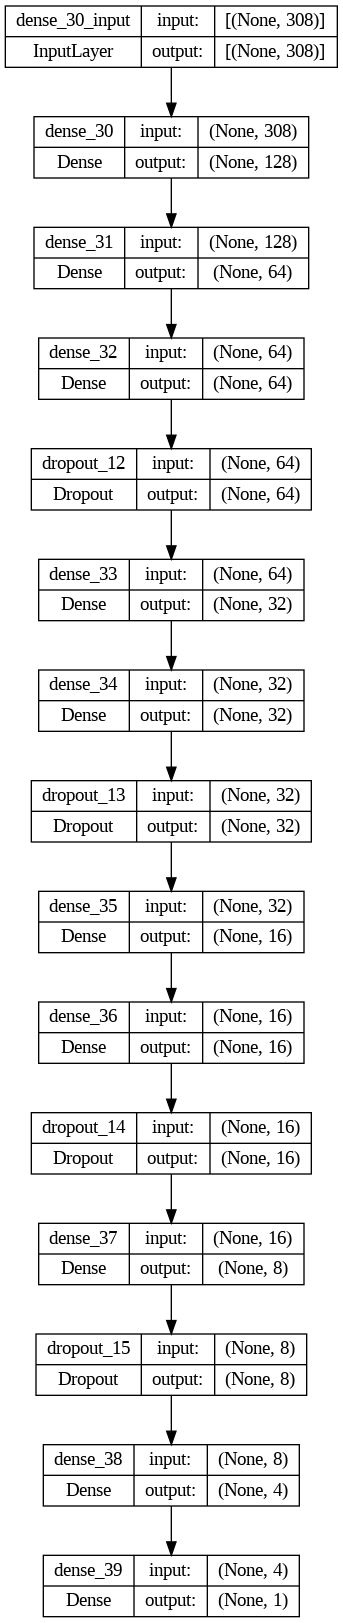

In [289]:
keras.utils.plot_model(model, to_file='png', show_shapes=True)

In [290]:
model.compile(optimizer = 'Adam', loss = 'mean_squared_error')
from keras.callbacks import EarlyStopping
es = EarlyStopping(patience = 2, monitor = 'val_loss')
model.fit(X_train, y_train, epochs = 25, batch_size = 10, validation_data = (X_test, y_test), callbacks = [es])

Epoch 1/25
8/8 [==============================] - 2s 36ms/step - loss: 0.1005 - val_loss: 0.2069
Epoch 2/25
8/8 [==============================] - 0s 10ms/step - loss: 0.0966 - val_loss: 0.1941
Epoch 3/25
8/8 [==============================] - 0s 17ms/step - loss: 0.0908 - val_loss: 0.1816
Epoch 4/25
8/8 [==============================] - 0s 13ms/step - loss: 0.0836 - val_loss: 0.1681
Epoch 5/25
8/8 [==============================] - 0s 13ms/step - loss: 0.0744 - val_loss: 0.1542
Epoch 6/25
8/8 [==============================] - 0s 11ms/step - loss: 0.0531 - val_loss: 0.1408
Epoch 7/25
8/8 [==============================] - 0s 10ms/step - loss: 0.0592 - val_loss: 0.1318
Epoch 8/25
8/8 [==============================] - 0s 8ms/step - loss: 0.0658 - val_loss: 0.1289
Epoch 9/25
8/8 [==============================] - 0s 10ms/step - loss: 0.0639 - val_loss: 0.1291
Epoch 10/25
8/8 [==============================] - 0s 10ms/step - loss: 0.0599 - val_loss: 0.1275
Epoch 11/25
8/8 [=============

<Axes: >

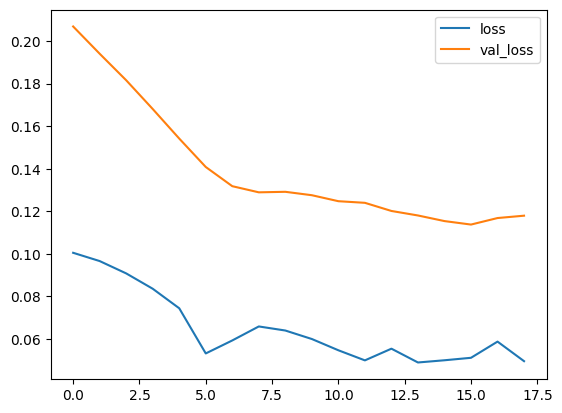

In [291]:
hist = model.history.history
h = pd.DataFrame(hist)
h.plot()

In [292]:
  y_predict = model.predict(X_test)
  y_predict

1/1 [==============================] - 0s 164ms/step


array([[0.18859655],
       [0.19958779],
       [0.19097182],
       [0.19319476],
       [0.19038466],
       [0.20367971],
       [0.19034201],
       [0.19897525],
       [0.20045404],
       [0.20978141],
       [0.1907322 ],
       [0.19045499],
       [0.18894072],
       [0.20020184],
       [0.20182079],
       [0.19589257],
       [0.1950508 ],
       [0.19572142],
       [0.220163  ],
       [0.18890244]], dtype=float32)

Text(0, 0.5, 'y_predict')

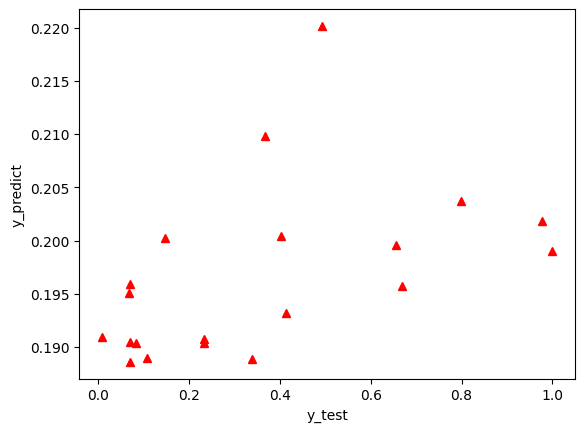

In [293]:
plt.plot(y_test,y_predict, '^', color = 'r')
plt.xlabel('y_test')
plt.ylabel('y_predict')

Text(0, 0.5, 'true_values')

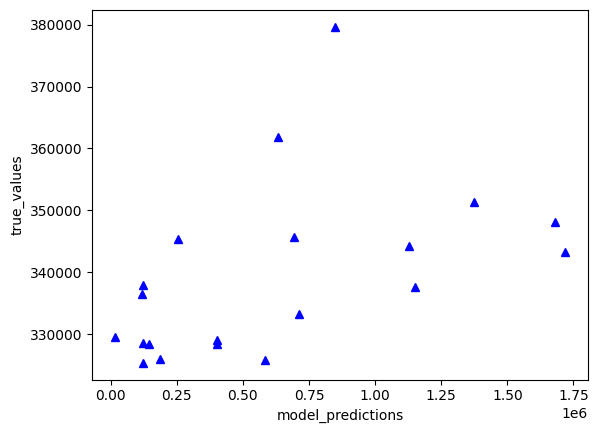

In [294]:
y_predict_original = Scaler.inverse_transform(y_predict)
y_test_original = Scaler.inverse_transform(y_test)
plt.plot(y_test_original,y_predict_original,'^',color = 'b')
plt.xlabel('model_predictions')
plt.ylabel('true_values')

In [295]:
k = X_test.shape
k
n = len(X_test)
print('\n')
n

20

In [296]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from math import sqrt
RMSE = float(format(np.sqrt(mean_squared_error(y_test_original,y_predict_original)), '0.3f'))
print(RMSE)

590152.018


In [297]:
MSE = mean_squared_error(y_test_original,y_predict_original)
print(MSE)

348279404558.6156


In [298]:
MAE = mean_absolute_error(y_test_original,y_predict_original)
print(MAE)

438665.3042499999


In [299]:
r2 = r2_score(y_test_original,y_predict_original)
print(r2)

-0.26509112819599023


In [300]:
model.save("Predictor.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
